# Seaborn tutorial

import libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib inline : to add plots to your Jupyter notebook
#%reload_ext autoreload : Reload all modules (except those excluded by %aimport) automatically now
#%autoreload 2 : Reload all modules (except those excluded by %aimport) every time before executing the Python code typed

%matplotlib inline 
%reload_ext autoreload 
%autoreload 2 

In [2]:
#to get the name of built in datasets in seaborn
print(sns.get_dataset_names())
crash_df = sns.load_dataset('car_crashes')
crash_df.head()

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


# Distribution Plots

# 1) Distribution Plot

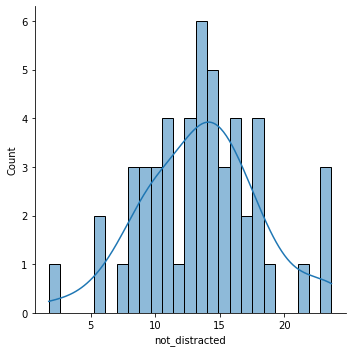

In [3]:
#Univariant distribution
#distplot is a deprecated function and will be removed in a future version
#Shift tab to see the attributes of particular syntax
sns.displot(crash_df['not_distracted'],kde=True,bins = 25)

# 2)Joint plot

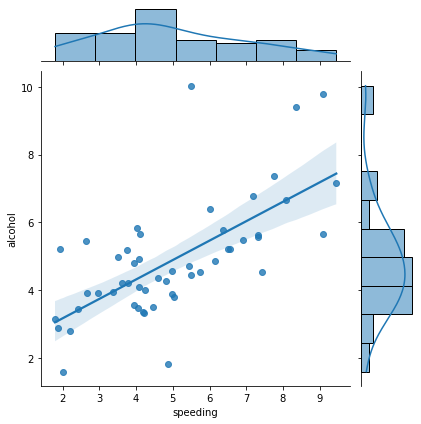

In [4]:
#Joint plot:to compare two distribution
sns.jointplot(x='speeding',y='alcohol',data=crash_df,kind='reg')

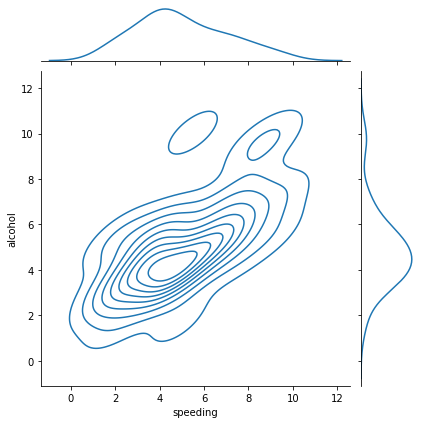

In [5]:
sns.jointplot(x='speeding',y='alcohol',data=crash_df,kind='kde')

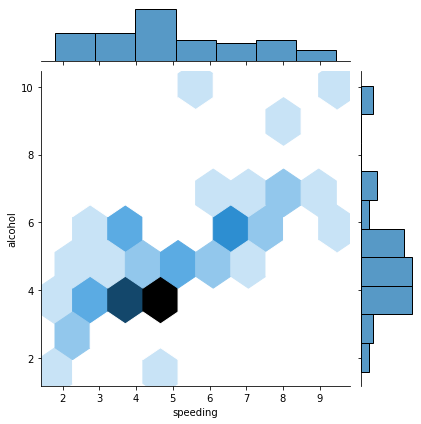

In [6]:
sns.jointplot(x='speeding',y='alcohol',data=crash_df,kind='hex')

# 3)KDE Plot

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

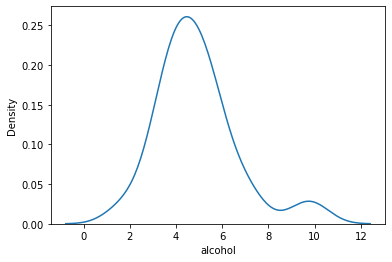

In [7]:
#Plot univariate or bivariate distributions using kernel density estimation.
#A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. 
#KDE represents the data using a continuous probability density curve in one or more dimensions.

sns.kdeplot(crash_df['alcohol'])

# 4)Pair PLots

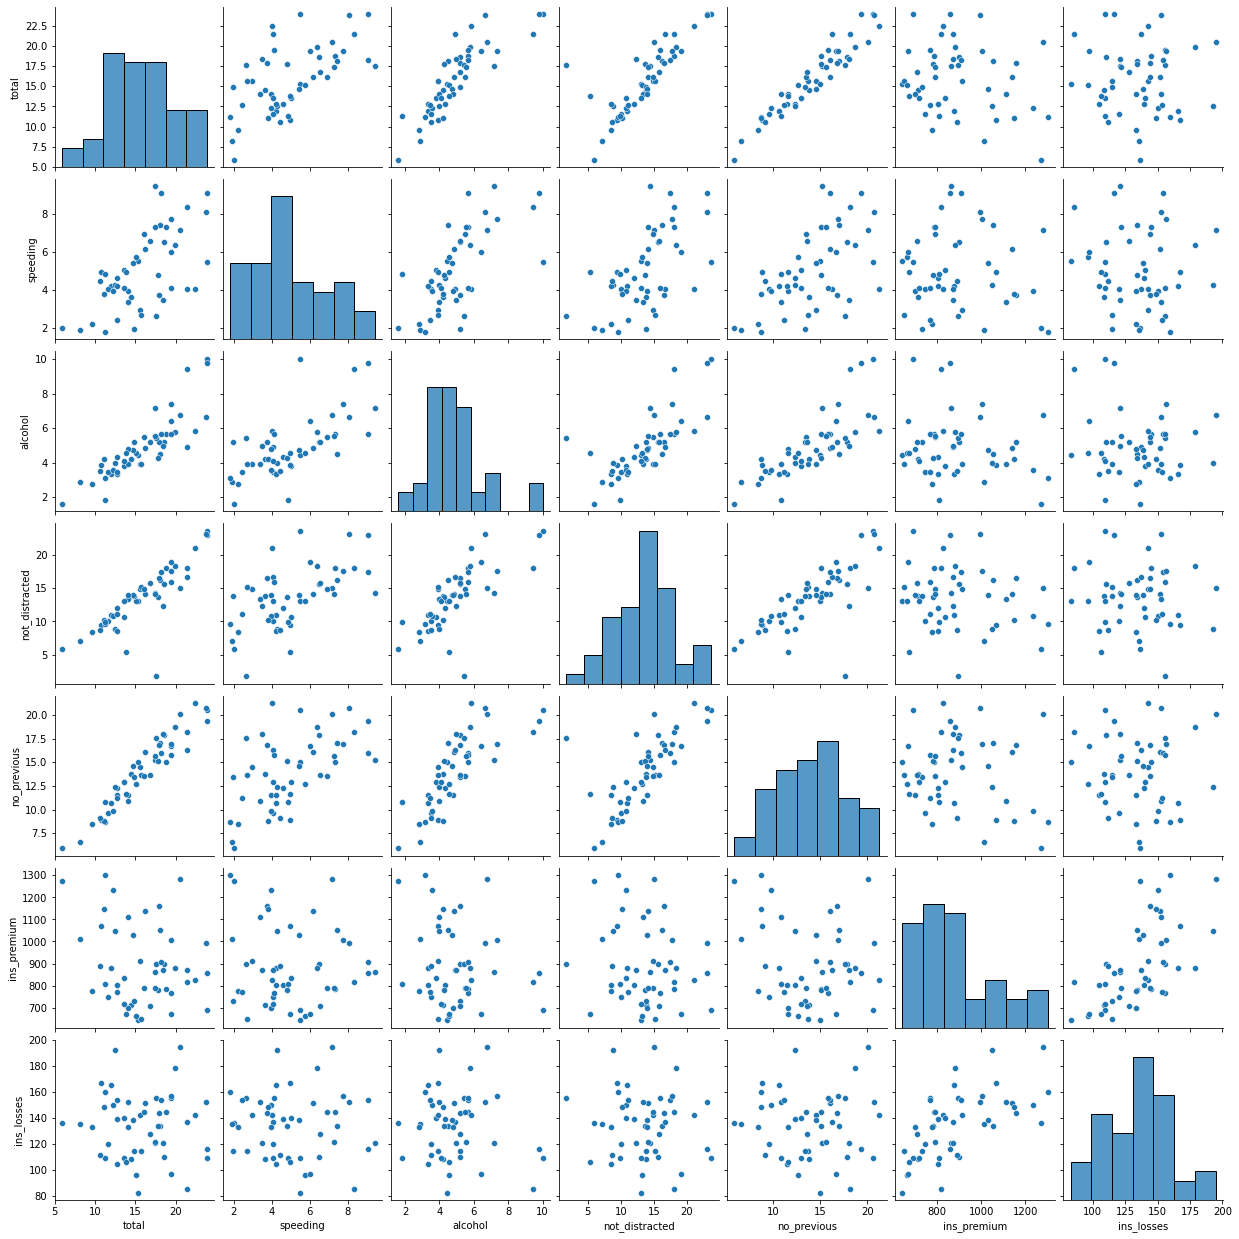

In [8]:
#Plot pairwise relationships in a dataset.

sns.pairplot(crash_df)

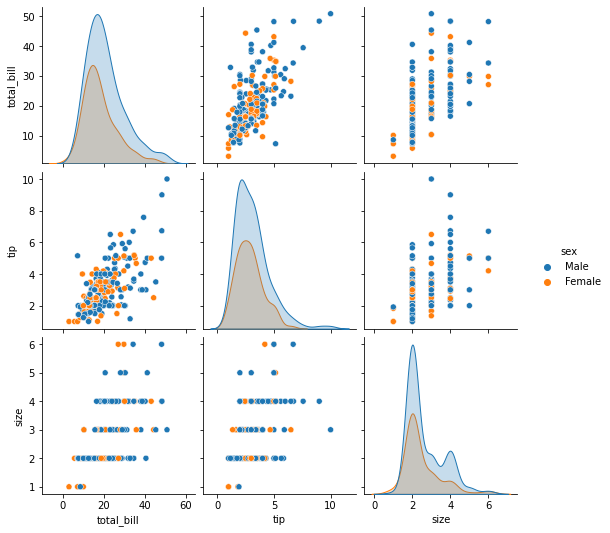

In [9]:
tips = sns.load_dataset('tips')
tips.head()
#sns.pairplot(tips,hue='sex',palette='Blues')
sns.pairplot(tips,hue='sex')

# 5)Rug PLot

<AxesSubplot:xlabel='tip'>

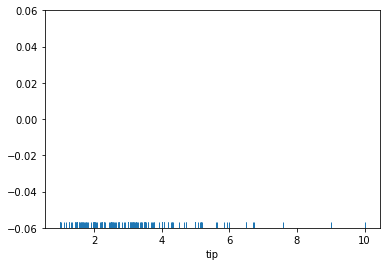

In [10]:
#Plot marginal distributions by drawing ticks along the x and y axes.
#This function is intended to complement other plots by showing the location of individual observations in an unobstrusive way.

sns.rugplot(tips['tip'])

# Styling

<Figure size 576x288 with 0 Axes>

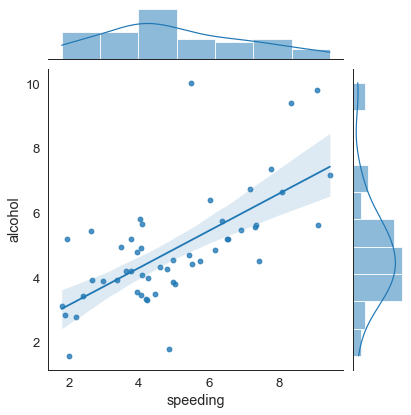

In [11]:
#sns.set_style('whitegrid') #other styles:white,dark,ticks,darkgrid

sns.set_style('white')
plt.figure(figsize=(8,4))
sns.set_context('paper',font_scale=1.5)
#sns.set_context('talk',font_scale=1.5)
#sns.set_context('poster',font_scale=1.5)

sns.jointplot(x='speeding',y='alcohol',data=crash_df,kind='reg')
#sns.despine(left=True,bottom=True) #Remove the top and right spines from plot(s)
plt.show()

# Categorical Plots

# 1)Bar Plot

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

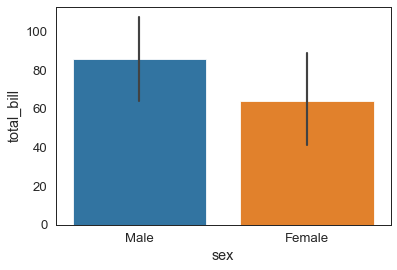

In [12]:
#sns.barplot(x='sex',y='total_bill',data=tips)
#bar line is referencing variance between the males and the total bill amounts
#by default this data is going to be aggregated based off of the mean, but can be changed to median, standard deviation, variance, covariance
#sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.median)
#sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)
#sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.var)
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.cov)

# 2)Count plot

<AxesSubplot:xlabel='sex', ylabel='count'>

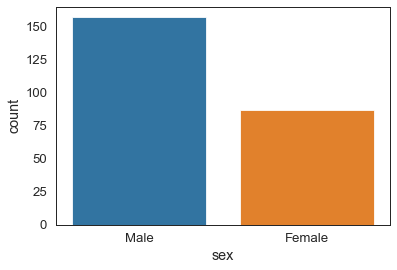

In [13]:
#count the number of occurrences
sns.countplot(x='sex',data=tips)

# 3)Box plot

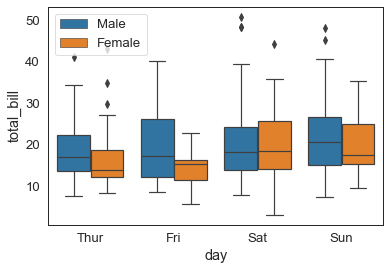

In [14]:
#to compare different variables, ie box plot to show distributions with respect to categories. show the quartiles of the data
# lines are whishkers and points are outliers
# data points aside form the standard deviation data are represented by whiskers
sns.boxplot(x='day',y='total_bill',data=tips,hue='sex')
plt.legend(loc=0)

# 4)Violin Plot

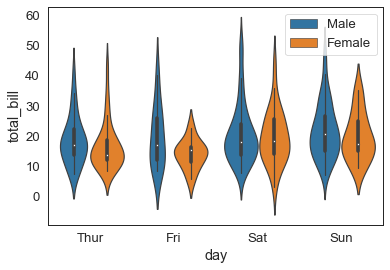

In [15]:
#Combination of box plot and kde
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex')
plt.legend(loc=0)

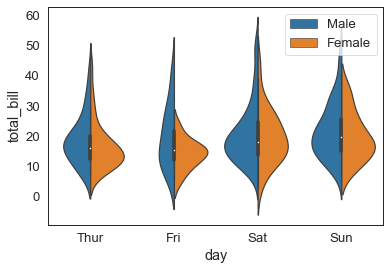

In [16]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)
plt.legend(loc=0)

# 5)Strip Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

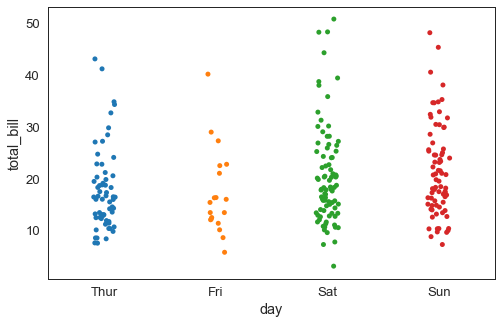

In [17]:
#Scatter plot representing all the different data, where one variable is categorical
plt.figure(figsize=(8,5))
sns.stripplot(x='day',y='total_bill',data=tips)

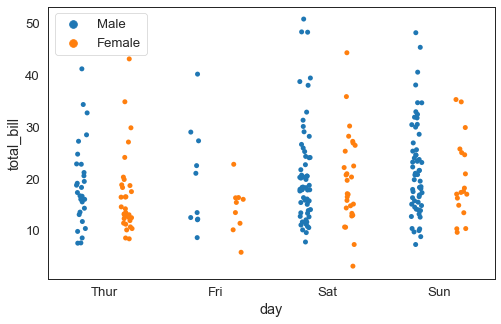

In [18]:
#jitter: to spread out points
#dodge: to separate male and female
plt.figure(figsize=(8,5))
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex',dodge=True)
plt.legend(loc=0)

# 6)Swarm plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

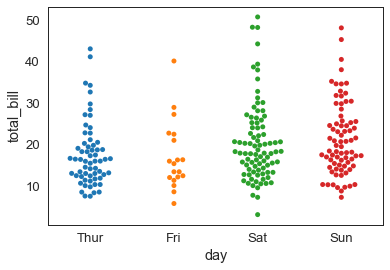

In [19]:
#a categorical scatterplot with non-overlapping points.
#This function is similar to :func:`stripplot`, but the points are adjusted (only along the categorical axis) so that they don't overlap.
sns.swarmplot(x='day',y='total_bill',data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

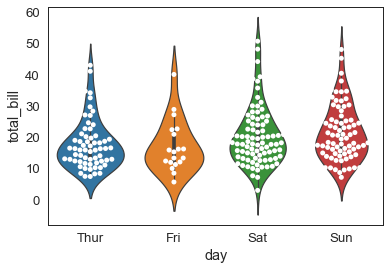

In [20]:
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='white')

# Palettes

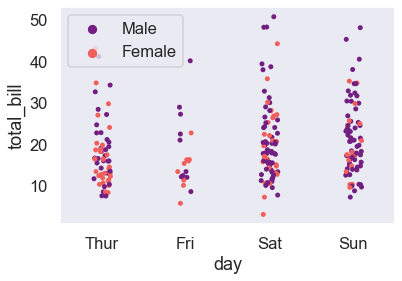

In [21]:
# plt.figure(figsize=(8,5))
sns.set_style('dark')
sns.set_context('talk')
sns.stripplot(x='day',y='total_bill',data=tips,hue='sex',palette='magma')
plt.legend(loc=0)#upper right:1,upper left:2,lower left:3,lower right:4

# Matrix plot

# 1)Heat maps

In [22]:
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [23]:
crash_df.shape

(51, 8)

In [24]:
crash_mx = crash_df.corr()
crash_mx

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


<AxesSubplot:>

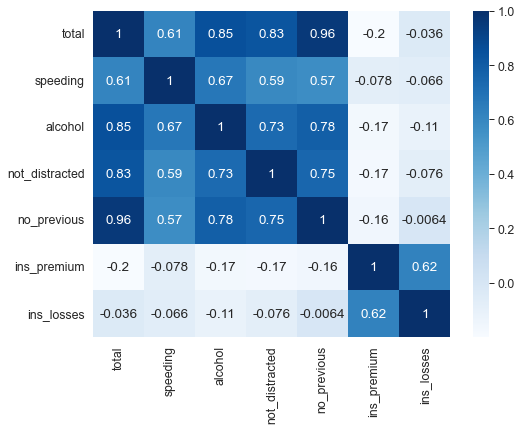

In [25]:
#heatmap:Plot rectangular data as a color-encoded matrix.
#annot: annotations is the numbers in the center of each part of our heat map
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)
sns.heatmap(crash_mx,annot=True,cmap='Blues')

In [26]:
flight = sns.load_dataset('flights')
flight.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [27]:
flight = flight.pivot_table(index='month',columns='year',values='passengers')
flight

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

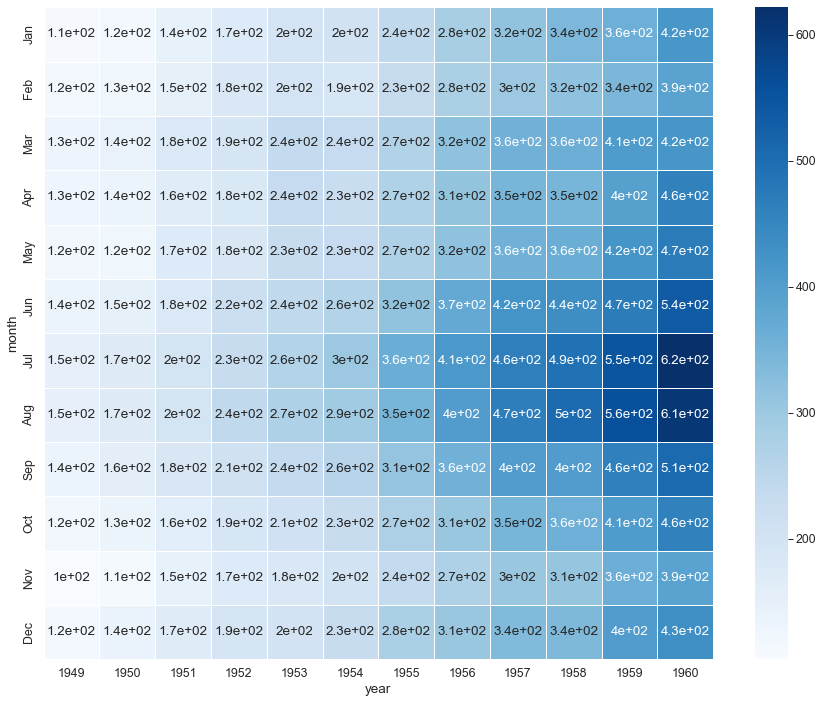

In [28]:
plt.figure(figsize=(15,12))
sns.heatmap(flight,annot=True,cmap='Blues',linecolor='white',linewidth=0.5)

# 2)Cluster map

In [29]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


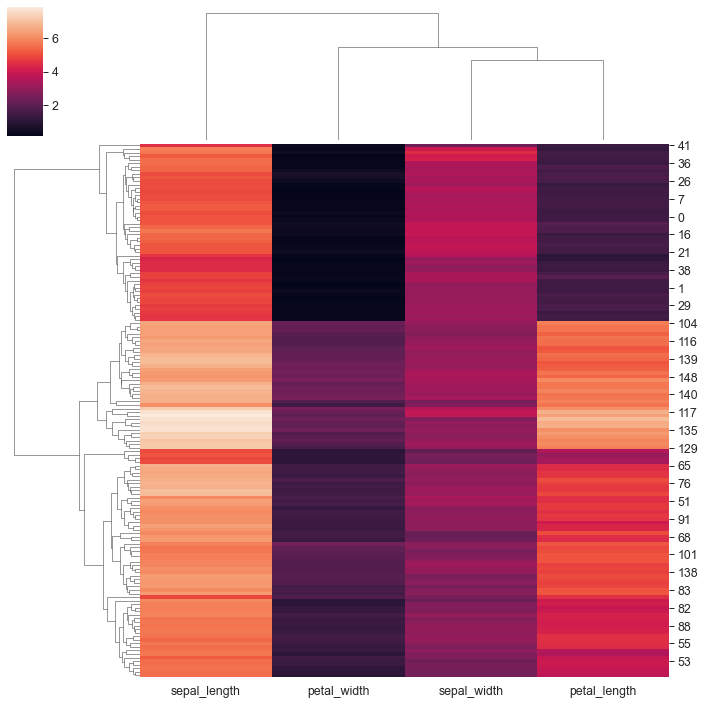

In [30]:
#sns.clustermap(iris) #ValueError: could not convert string to float: 'setosa'
#Distance between the points are going to be calculated and then the closest are going to be joined
species = iris.pop('species')
sns.clustermap(iris)

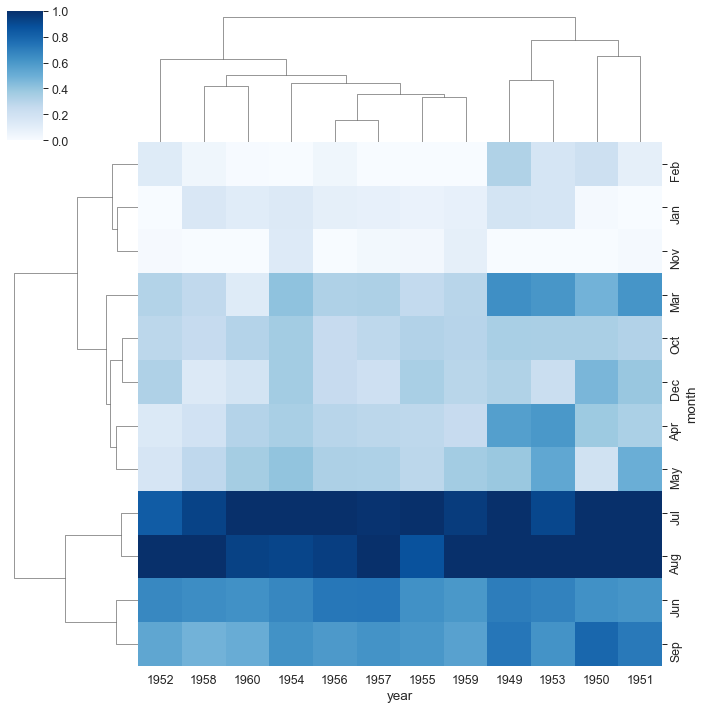

In [31]:
#standard_scale : normalize the data to focus on th clustering which is going to sort of mess up the dates
sns.clustermap(flight,cmap='Blues',standard_scale=1)

# 3)Pair Grid

In [32]:
iris = sns.load_dataset('iris')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


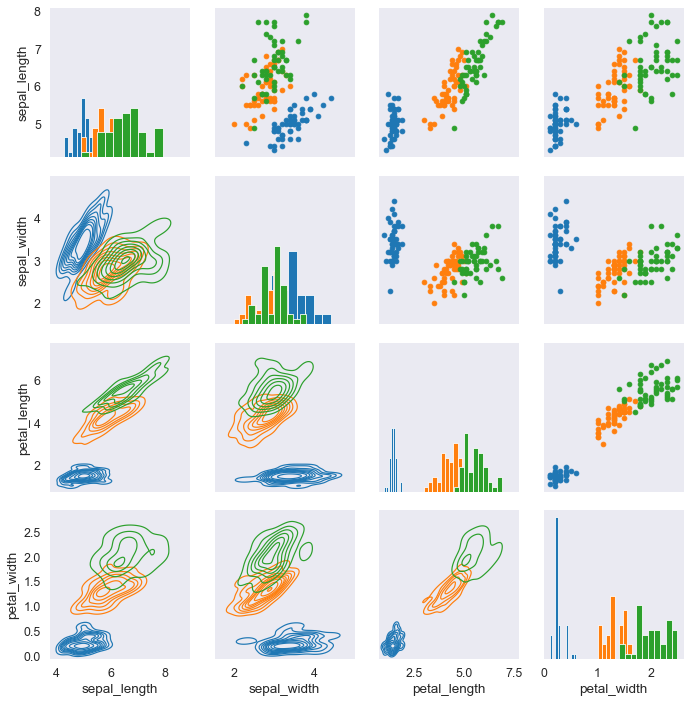

In [33]:
#Create an empty grid system based of this iris dataset
iris_g = sns.PairGrid(iris,hue='species')
#iris_g.map(plt.scatter)
iris_g.map_diag(plt.hist)
#iris_g.map_offdiag(plt.scatter)
iris_g.map_upper(plt.scatter)
iris_g.map_lower(sns.kdeplot)

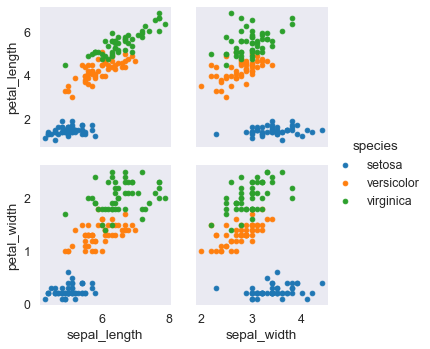

In [34]:
iris_g = sns.PairGrid(iris,hue='species',x_vars=['sepal_length','sepal_width'],y_vars=['petal_length','petal_width'])
iris_g.map(plt.scatter)
iris_g.add_legend()

# 4)Facet Grid

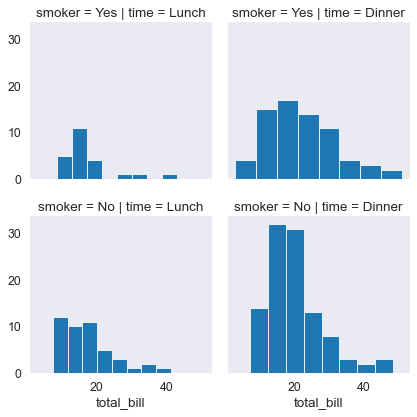

In [35]:
#To print multiple plots in a grid in which you are going to be able to define your columns and rows
tips_fg = sns.FacetGrid(tips,col='time',row='smoker')
tips_fg.map(plt.hist,'total_bill',bins=8)

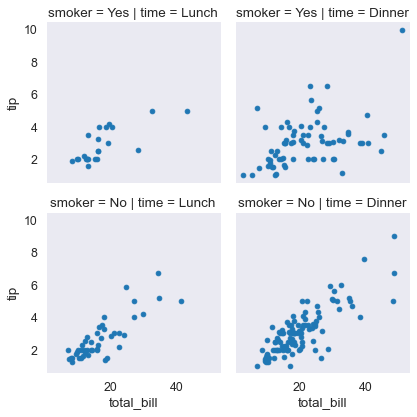

In [36]:
tips_fg = sns.FacetGrid(tips,col='time',row='smoker')
tips_fg.map(plt.scatter,'total_bill','tip')

In [37]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


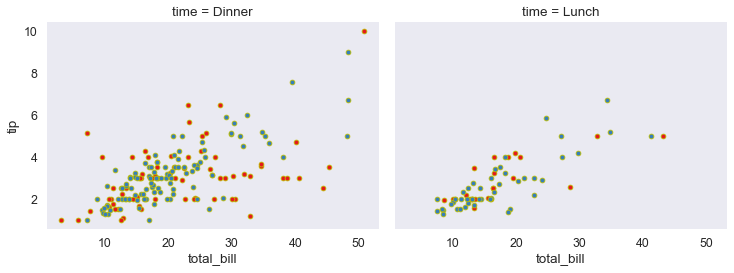

In [38]:
tips_fg = sns.FacetGrid(tips,col='time',hue='smoker',height=4,aspect=1.3,col_order=['Dinner','Lunch'],palette='Set1')
tips_fg.map(plt.scatter,'total_bill','tip',edgecolor='y')

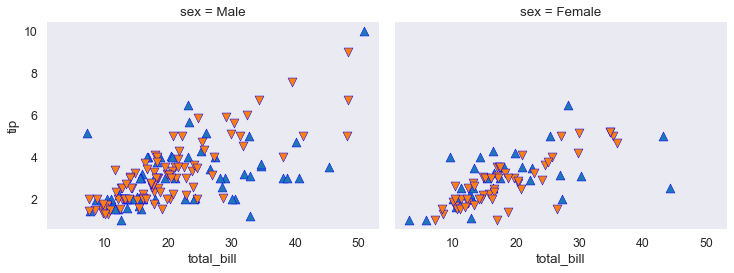

In [39]:
kws = dict(s=80,linewidth=.5,edgecolor='b')
tips_fg = sns.FacetGrid(tips,col='sex',hue='smoker',height=4,aspect=1.3,
                       hue_order=['Yes','No'],
                       hue_kws=dict(marker=['^','v']))
tips_fg.map(plt.scatter,'total_bill','tip',**kws)

In [40]:
att_df = sns.load_dataset('attention')
att_df.head()

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


In [41]:
att_df['attention'].value_counts()

divided    30
focused    30
Name: attention, dtype: int64

In [42]:
att_df.shape

(60, 5)

In [43]:
att_df['subject'].value_counts()

1     3
2     3
19    3
18    3
17    3
16    3
15    3
14    3
13    3
12    3
11    3
10    3
9     3
8     3
7     3
6     3
5     3
4     3
3     3
20    3
Name: subject, dtype: int64

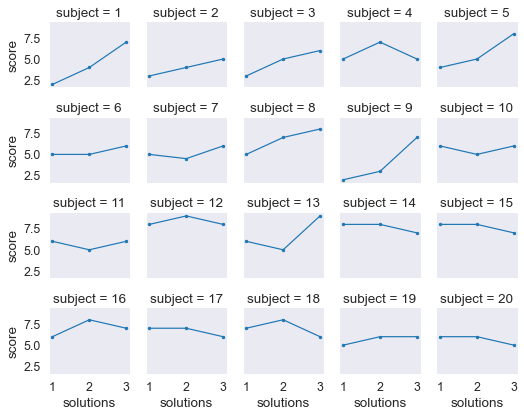

In [44]:
att_fg = sns.FacetGrid(att_df,col='subject',col_wrap=5,height=1.5)
att_fg.map(plt.plot,'solutions','score',marker='.')

# Regression PLots

In [45]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 576x432 with 0 Axes>

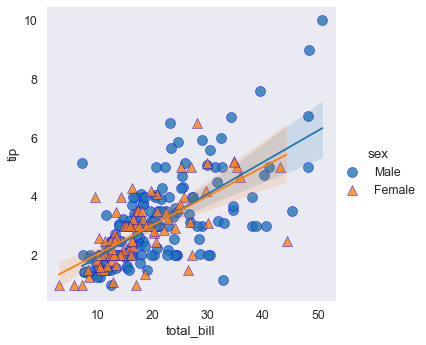

In [46]:
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)
sns.lmplot(x='total_bill',y='tip',hue='sex',data=tips,markers=['o','^'],
          scatter_kws={'s':100,'linewidth':0.5,'edgecolor':'b'})

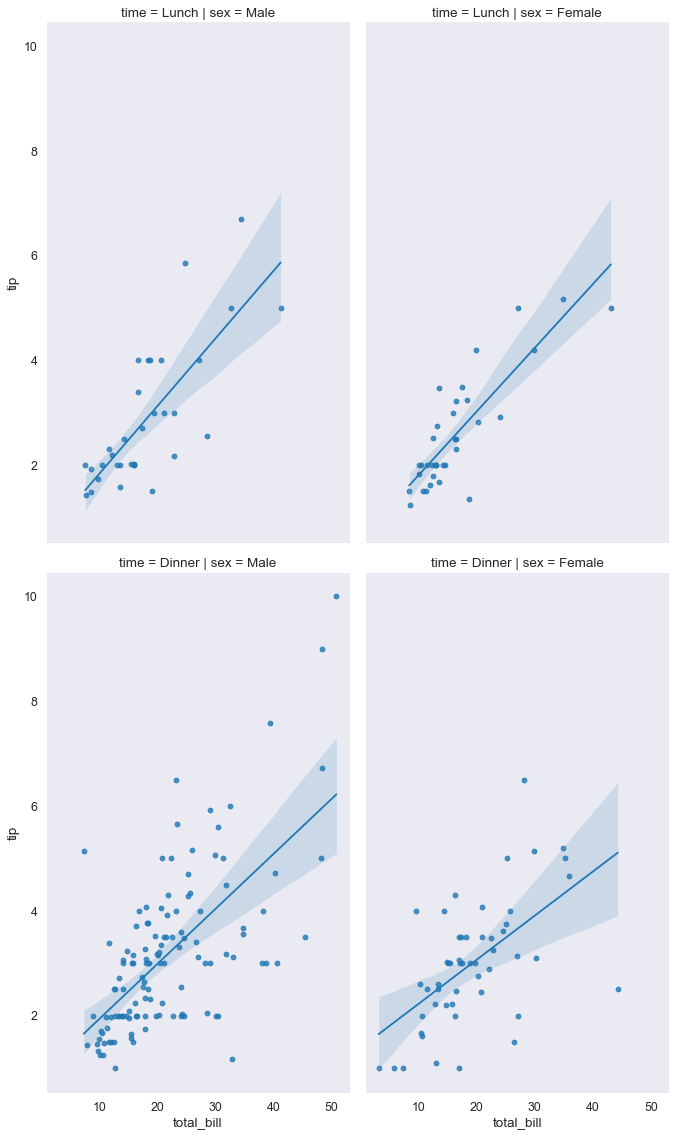

In [47]:
sns.lmplot(x='total_bill',y='tip',col='sex',row='time',data=tips,height=8,aspect=0.6)